In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import os
import unidecode
import plotly.io as pio
pio.kaleido.scope.mathjax = None
pio.templates.default = "plotly_white"


In [2]:
def read_csvs(path):
    folders = []
    directory = os.path.join(path)
    for root,dirs,files in os.walk(directory):
        folders.append(root)
    del folders[0]

    data_final = []
    for folder in folders:
        df = pd.concat(map(pd.read_csv, glob.glob(os.path.join(folder + "/*.csv"))))
        state_name = folder.split("/")[-1]
        state_name = unidecode.unidecode(state_name.lower())
        state_name = state_name.replace(" ", "_")
        df['estado'] = state_name
        data_final.append(df)
    
    concat_data = pd.concat(data_final,ignore_index=True)
    return concat_data

In [3]:
data_2022 = read_csvs("./scraped_data_2022/")
data_2022.drop(['Descripción', 'Tarifa'], axis=1, inplace=True)
data_2022['date'] = pd.to_datetime(data_2022.year.astype(str) + '/' + data_2022.month.astype(str))
data_2022['date'] = data_2022.date.dt.date
data_2022.isna().sum()

Int. Horario      0
Cargo             0
Unidades          0
Valor             0
year              0
month             0
state             0
municipality      0
division          0
division_value    0
estado            0
date              0
dtype: int64

In [4]:
data_2022

,Int. Horario,Cargo,Unidades,Valor,year,month,state,municipality,division,division_value,estado,date
0,-,Fijo,$/mes,277.7600,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes,2022-01-01
1,Base,Variable (Energía),$/kWh,0.9541,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes,2022-01-01
2,Intermedia,Variable (Energía),$/kWh,1.6819,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes,2022-01-01
3,Punta,Variable (Energía),$/kWh,1.9140,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes,2022-01-01
4,-,Distribución,$/kW,107.4500,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
153703,Base,Variable (Energía),$/kWh,1.0117,2022,10,ZACATECAS,2442,BAJÍO,3,zacatecas,2022-10-01
153704,Intermedia,Variable (Energía),$/kWh,1.7942,2022,10,ZACATECAS,2442,BAJÍO,3,zacatecas,2022-10-01
153705,Punta,Variable (Energía),$/kWh,2.0437,2022,10,ZACATECAS,2442,BAJÍO,3,zacatecas,2022-10-01
153706,-,Distribución,$/kW,107.4500,2022,10,ZACATECAS,2442,BAJÍO,3,zacatecas,2022-10-01


In [10]:
data_2021 = read_csvs("./scraped_data_2021/")
data_2021.drop(['Descripción', 'Tarifa'], axis=1, inplace=True)
data_2021['date'] = pd.to_datetime(data_2021.year.astype(str) + '/' + data_2021.month.astype(str))
#data_2021.dropna(subset=['Unidades'], inplace=True)
data_2021.isna().sum()

Int. Horario      0
Cargo             0
Unidades          0
Valor             0
year              0
month             0
state             0
municipality      0
division          0
division_value    0
estado            0
date              0
dtype: int64

In [6]:
data_2020 = read_csvs("./scraped_data_2020/")
data_2020.drop(['Descripción', 'Tarifa'], axis=1, inplace=True)
data_2020['date'] = pd.to_datetime(data_2020.year.astype(str) + '/' + data_2020.month.astype(str))
data_2020.isna().sum()

Int. Horario      0
Cargo             0
Unidades          0
Valor             0
year              0
month             0
state             0
municipality      0
division          0
division_value    0
estado            0
date              0
dtype: int64

In [8]:
data_2020.sort_values(by='division').division.unique()

array(['BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'BAJÍO',
       'BAJÍO Y GOLFO CENTRO', 'BAJÍO Y GOLFO NORTE',
       'BAJÍO Y GOLFO NORTE Y NORTE', 'BAJÍO Y NORTE', 'CENTRO OCCIDENTE',
       'CENTRO OCCIDENTE Y JALISCO', 'CENTRO ORIENTE', 'CENTRO SUR',
       'GOLFO CENTRO', 'GOLFO CENTRO Y GOLFO NORTE',
       'GOLFO CENTRO Y ORIENTE', 'GOLFO NORTE', 'GOLFO NORTE Y NORTE',
       'JALISCO', 'NOROESTE', 'NOROESTE Y NORTE', 'NORTE', 'ORIENTE',
       'PENINSULAR', 'SURESTE', 'VALLE DE MÉXICO CENTRO',
       'VALLE DE MÉXICO CENTRO Y SUR', 'VALLE DE MÉXICO NORTE',
       'VALLE DE MÉXICO NORTE Y CENTRO',
       'VALLE DE MÉXICO NORTE, CENTRO Y SUR', 'VALLE DE MÉXICO SUR',
       'VALLE DE MÉXICO SUR Y CENTRO ORIENTE'], dtype=object)

In [5]:
division_oficial = ['BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'BAJÍO',
    'CENTRO OCCIDENTE', 'CENTRO ORIENTE', 'CENTRO SUR', 'GOLFO CENTRO','GOLFO NORTE',
    'JALISCO', 'NOROESTE', 'NORTE', 'ORIENTE', 'PENINSULAR', 'SURESTE', 
    'VALLE DE MÉXICO CENTRO', 'VALLE DE MÉXICO NORTE', 'VALLE DE MÉXICO SUR']

print("La cantidad de divisiones oficiales es:", len(division_oficial))

La cantidad de divisiones oficiales es: 17


In [11]:
cargo_fijo = data_2021[(data_2021.division.isin(division_oficial))&(data_2021.Cargo=='Fijo')]
cargo_fijo.reset_index(drop=True, inplace=True)
cargo_fijo

,Int. Horario,Cargo,Unidades,Valor,year,month,state,municipality,division,division_value,estado,date
0,-,Fijo,$/mes,478.51,2021,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes,2021-01-01
1,-,Fijo,$/mes,478.51,2021,1,ASIENTOS,2,BAJÍO,3,aguascalientes,2021-01-01
2,-,Fijo,$/mes,478.51,2021,1,CALVILLO,3,BAJÍO,3,aguascalientes,2021-01-01
3,-,Fijo,$/mes,478.51,2021,1,COSIO,4,BAJÍO,3,aguascalientes,2021-01-01
4,-,Fijo,$/mes,478.51,2021,1,EL LLANO,5,BAJÍO,3,aguascalientes,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
29824,-,Fijo,$/mes,478.51,2021,12,VILLA GARCIA,2438,BAJÍO,3,zacatecas,2021-12-01
29825,-,Fijo,$/mes,478.51,2021,12,VILLA GONZALEZ ORTEGA,2439,BAJÍO,3,zacatecas,2021-12-01
29826,-,Fijo,$/mes,478.51,2021,12,VILLA HIDALGO,2440,BAJÍO,3,zacatecas,2021-12-01
29827,-,Fijo,$/mes,478.51,2021,12,VILLANUEVA,2441,BAJÍO,3,zacatecas,2021-12-01


In [12]:
def get_max_min(data, division):
    for div in division:
        max = data[data.division==div].Valor.max()
        min = data[data.division==div].Valor.min()
        print(max- min)
        print(div)
        print(60*"-")

In [13]:
get_max_min(cargo_fijo, division_oficial)

0.0
BAJA CALIFORNIA
------------------------------------------------------------
0.0
BAJA CALIFORNIA SUR
------------------------------------------------------------
0.0
BAJÍO
------------------------------------------------------------
131.99
CENTRO OCCIDENTE
------------------------------------------------------------
200.65999999999997
CENTRO ORIENTE
------------------------------------------------------------
214.37
CENTRO SUR
------------------------------------------------------------
42.75999999999999
GOLFO CENTRO
------------------------------------------------------------
0.0
GOLFO NORTE
------------------------------------------------------------
11.1099999999999
JALISCO
------------------------------------------------------------
0.0
NOROESTE
------------------------------------------------------------
0.0
NORTE
------------------------------------------------------------
171.42999999999995
ORIENTE
------------------------------------------------------------
0.0
PENINSULAR
-

In [8]:
get_max_min(cargo_fijo, division_oficial)

0.0
BAJA CALIFORNIA
------------------------------------------------------------
0.0
BAJA CALIFORNIA SUR
------------------------------------------------------------
390.35
BAJÍO
------------------------------------------------------------
426.26
CENTRO OCCIDENTE
------------------------------------------------------------
213.39
CENTRO ORIENTE
------------------------------------------------------------
375.16
CENTRO SUR
------------------------------------------------------------
0.0
GOLFO CENTRO
------------------------------------------------------------
0.0
GOLFO NORTE
------------------------------------------------------------
0.0
JALISCO
------------------------------------------------------------
nan
NOROESTE
------------------------------------------------------------
0.0
NORTE
------------------------------------------------------------
0.0
ORIENTE
------------------------------------------------------------
0.0
PENINSULAR
----------------------------------------------------

In [55]:
def get_cargo_variacion(data, anio, division_oficial, tipo_cargo, etiqueta = 'Cargo fijo ($/mes)'):
    cargo = data[(data.division.isin(division_oficial))&(data.Cargo==tipo_cargo)]
    cargo.reset_index(drop=True, inplace=True)
    fig = px.line(cargo, x='date', y='Valor', color='division', line_group = 'estado',
        title='Variación de la tarifa de cargo {} por division durante el año {}'.format(tipo_cargo,anio),
        labels={'date':'Fecha por mes', 'Valor':etiqueta}, width=1200, height=650, markers=True)
    #fig.update_xaxes(rangeslider_visible=True)
    return fig

In [15]:
cargo_fijo_2020 = get_cargo_variacion(data_2020, 2020, division_oficial, 'Fijo', 'Cargo fijo ($/mes)')
cargo_fijo_2020.write_html("./assets/images/html/cargo_fijo_2020.html")
cargo_fijo_2020.write_image("./assets/images/png/cargo_fijo_2020.png")

cargo_fijo_2021 = get_cargo_variacion(data_2021, 2021, division_oficial, 'Fijo', 'Cargo fijo ($/mes)')
cargo_fijo_2021.write_html("./assets/images/html/cargo_fijo_2021.html")
cargo_fijo_2021.write_image("./assets/images/png/cargo_fijo_2021.png")

cargo_fijo_2022 = get_cargo_variacion(data_2022, 2022, division_oficial, 'Fijo', 'Cargo fijo ($/mes)')
cargo_fijo_2022.write_html("./assets/images/html/cargo_fijo_2022.html")
cargo_fijo_2022.write_image("./assets/images/png/cargo_fijo_2022.png")

In [16]:
cargo_dist_2020 = get_cargo_variacion(data_2020,2020,division_oficial,'Distribución','Distribución ($/kW)')
cargo_dist_2020.write_html("./assets/images/html/distribucion_2020.html")
cargo_dist_2020.write_image("./assets/images/png/distribucion_2020.png")

cargo_dist_2021 = get_cargo_variacion(data_2021,2021,division_oficial,'Distribución','Distribución ($/kW)')
cargo_dist_2021.write_html("./assets/images/html/distribucion_2021.html")
cargo_dist_2021.write_image("./assets/images/png/distribucion_2021.png")

cargo_dist_2022 = get_cargo_variacion(data_2022,2022,division_oficial,'Distribución','Distribución ($/kW)')
cargo_dist_2022.write_html("./assets/images/html/distribucion_2022.html")
cargo_dist_2022.write_image("./assets/images/png/distribucion_2022.png")

In [59]:
cargo_cap_2020 = get_cargo_variacion(data_2020,2020,division_oficial,'Capacidad','Capacidad ($/kW)')
cargo_cap_2020.write_html("./assets/images/html/capacidad_2020.html")
cargo_cap_2020.write_image("./assets/images/png/capacidad_2020.png")

cargo_cap_2021 = get_cargo_variacion(data_2021,2021,division_oficial,'Capacidad','Capacidad ($/kW)')
cargo_cap_2021.write_html("./assets/images/html/capacidad_2021.html")
cargo_cap_2021.write_image("./assets/images/png/capacidad_2021.png")

cargo_cap_2022 = get_cargo_variacion(data_2022,2022,division_oficial,'Capacidad','Capacidad ($/kW)')
cargo_cap_2022.write_html("./assets/images/html/capacidad_2022.html")
cargo_cap_2022.write_image("./assets/images/png/capacidad_2022.png")

In [85]:
def get_violin_plot(data, anio, division_oficial):
    cargo = data[(data.division.isin(division_oficial))&(data.Cargo=='Capacidad')]
    cargo.reset_index(drop=True, inplace=True)
    fig = px.violin(cargo, y="Valor", color="division", box=True, points='suspectedoutliers',
        title='Distribución de la tarifa de cargo capacidad por division durante el año {}'.format(anio),
        labels={'Valor':'Capacidad ($/kW)'}, width=1200, height=650)
    return fig

In [90]:
violin_cap_2020 = get_violin_plot(data_2020,2020,division_oficial)
violin_cap_2020.write_html("./assets/images/html/violin_capacidad_2020.html")
violin_cap_2020.write_image("./assets/images/png/violin_capacidad_2020.png")

violin_cap_2021 = get_violin_plot(data_2021,2021,division_oficial)
violin_cap_2021.write_html("./assets/images/html/violin_capacidad_2021.html")
violin_cap_2021.write_image("./assets/images/png/violin_capacidad_2021.png")

violin_cap_2022 = get_violin_plot(data_2022,2022,division_oficial)
violin_cap_2022.write_html("./assets/images/html/violin_capacidadd_2022.html")
violin_cap_2022.write_image("./assets/images/png/violin_capacidad_2022.png")

<AxesSubplot:xlabel='Valor', ylabel='Count'>

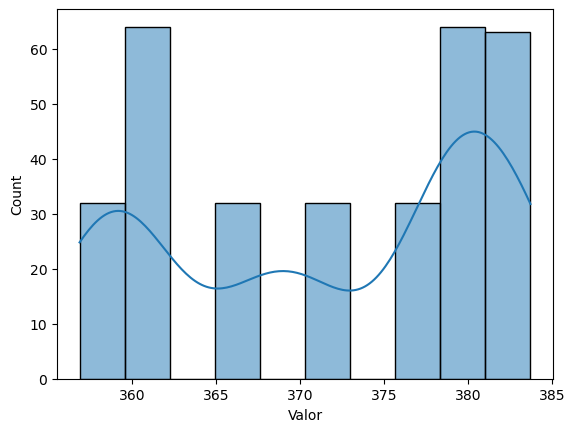

In [83]:
sns.histplot(cargo[cargo.division=='VALLE DE MÉXICO NORTE'].Valor, kde=True)

In [156]:
t = (data_2022[(data_2022['Int. Horario'] == 'Base')&(data_2022['division'].isin(division_oficial))])[['Valor','month', 'division', 'date']].groupby(['division','date']).agg([np.mean, np.std])
t.reset_index(inplace=True)

In [158]:
t

division        date   Valor      month     
                                        mean  std  mean  std
0        BAJA CALIFORNIA  2022-01-01  0.5603  0.0   1.0  0.0
1        BAJA CALIFORNIA  2022-02-01  0.5635  0.0   2.0  0.0
2        BAJA CALIFORNIA  2022-03-01  0.5635  0.0   3.0  0.0
3        BAJA CALIFORNIA  2022-04-01  0.5747  0.0   4.0  0.0
4        BAJA CALIFORNIA  2022-05-01  0.5834  0.0   5.0  0.0
..                   ...         ...     ...  ...   ...  ...
165  VALLE DE MÉXICO SUR  2022-06-01  1.0324  0.0   6.0  0.0
166  VALLE DE MÉXICO SUR  2022-07-01  1.0568  0.0   7.0  0.0
167  VALLE DE MÉXICO SUR  2022-08-01  1.0616  0.0   8.0  0.0
168  VALLE DE MÉXICO SUR  2022-09-01  1.0666  0.0   9.0  0.0
169  VALLE DE MÉXICO SUR  2022-10-01  1.0701  0.0  10.0  0.0

[170 rows x 6 columns]

In [159]:
t.Valor['std'].isna().sum()

0

In [162]:
croped_data = data_2022[(data_2022['Int. Horario'] == 'Base')&(data_2022['division'].isin(division_oficial))]
croped_data.reset_index(drop=True, inplace=True)
croped_data = croped_data[['Valor','month', 'division', 'date']].groupby(['division','date']).agg([np.mean, np.std])
croped_data.reset_index(inplace=True)

In [164]:
croped_data.Valor['std'].sum()

0.0003267686915507382

In [166]:
croped_data[croped_data.Valor['std']!=0]

division        date     Valor           month     
                                 mean       std  mean  std
78  GOLFO NORTE  2022-09-01  0.976434  0.000327   9.0  0.0

In [168]:
data_2022[(data_2022['Int. Horario'] == 'Base')&(data_2022['division']=='GOLFO NORTE')].groupby(['date']).agg([np.mean, np.std])

C:\Users\roker\AppData\Local\Temp\ipykernel_6368\62364131.py:1: FutureWarning:

['Int. Horario', 'Cargo', 'Unidades', 'state', 'division', 'estado'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Valor              year      month      municipality  \
                mean       std    mean  std  mean  std         mean   
date                                                                  
2022-01-01  0.924300  0.000000  2022.0  0.0   1.0  0.0   849.932584   
2022-02-01  0.930600  0.000000  2022.0  0.0   2.0  0.0   851.077778   
2022-03-01  0.930600  0.000000  2022.0  0.0   3.0  0.0   851.077778   
2022-04-01  0.952900  0.000000  2022.0  0.0   4.0  0.0   851.077778   
2022-05-01  0.970100  0.000000  2022.0  0.0   5.0  0.0   851.077778   
2022-06-01  0.945700  0.000000  2022.0  0.0   6.0  0.0   851.077778   
2022-07-01  0.967600  0.000000  2022.0  0.0   7.0  0.0   851.077778   
2022-08-01  0.972000  0.000000  2022.0  0.0   8.0  0.0   850.112360   
2022-09-01  0.976434  0.000327  2022.0  0.0   9.0  0.0   851.077778   
2022-10-01  0.979500  0.000000  2022.0  0.0  10.0  0.0   851.077778   

                       division_value       
                   std           mean  std  
date                                        
2022-01-01  542.343144           15.0  0.0  
2022-02-01  539.397088           15.0  0.0  
2022-03-01  539.397088           15.0  0.0  
2022-04-01  539.397088           15.0  0.0  
2022-05-01  539.397088           15.0  0.0  
2022-06-01  539.397088           15.0  0.0  
2022-07-01  539.397088           15.0  0.0  
2022-08-01  542.374984           15.0  0.0  
2022-09-01  539.397088           15.0  0.0  
2022-10-01  539.397088           15.0  0.0

In [171]:
data_2022[(data_2022['month']==9)&(data_2022['division']=='GOLFO NORTE')&(data_2022['Int. Horario'] == 'Base')&(data_2022.Valor!=0.9764)]

,Int. Horario,Cargo,Unidades,Valor,year,month,state,municipality,division,division_value,estado,date
61813,Base,Variable (Energía),$/kWh,0.9795,2022,9,GRAL. ZARAGOZA,954,GOLFO NORTE,15,nuevo_leon,2022-09-01


In [12]:
def get_variacion_tarifas(data, anio, division_oficial, tarifa_horario):
    croped_data = data[(data['Int. Horario'] == tarifa_horario)&(data['division'].isin(division_oficial))]
    croped_data.reset_index(drop=True, inplace=True)
    croped_data = croped_data[['Valor','month', 'division', 'date']].groupby(['division','date']).agg([np.mean, np.std])
    croped_data.reset_index(inplace=True)

    if croped_data.Valor['std'].sum() == 0.0:
        croped_data = croped_data.pivot(index='date', columns='division', values=('Valor', 'mean'))
        fig = px.area(croped_data, facet_col="division", facet_col_wrap=6, markers=True, range_y=[0.5, 1.99],
              title='Variación de la tarifa de interés horario base por division durante el año {}'.format(anio), width=1800, height=650)
        return fig
    else:
        print('Hay algo extraño con los datos, existen variaciones en la tarifa de interés por mes y region, revisar')
        return None


In [15]:
get_variacion_tarifas(data_2022,2022,division_oficial,'Base')

In [140]:
t.reset_index().Valor['std'].sum()

0.0

In [112]:
t.reset_index().pivot(index='date', columns='division', values=('Valor', 'mean'))

division,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,BAJÍO,CENTRO OCCIDENTE,CENTRO ORIENTE,CENTRO SUR,GOLFO CENTRO,GOLFO NORTE,JALISCO,NOROESTE,NORTE,ORIENTE,PENINSULAR,SURESTE,VALLE DE MÉXICO CENTRO,VALLE DE MÉXICO NORTE,VALLE DE MÉXICO SUR
date,,,,,,,,,,,,,,,,,
2020-01-01,0.5492,1.8557,0.9394,0.9375,0.9352,0.8608,0.8914,0.9098,0.9034,0.8644,0.9101,0.8287,1.0971,0.9006,0.9862,0.9836,0.9933
2020-02-01,0.5464,1.8432,0.9338,0.9318,0.9295,0.8557,0.8861,0.9044,0.8980,0.8593,0.9047,0.8239,1.0903,0.8953,0.9802,0.9776,0.9872
2020-03-01,0.5488,1.8540,0.9387,0.9367,0.9344,0.8600,0.8907,0.9091,0.9026,0.8637,0.9094,0.8280,1.0962,0.8999,0.9854,0.9828,0.9924
2020-04-01,0.5512,1.8646,0.9435,0.9415,0.9392,0.8644,0.8952,0.9137,0.9072,0.8681,0.9140,0.8321,1.1020,0.9045,0.9905,0.9879,0.9976
2020-05-01,0.5471,1.8464,0.9352,0.9332,0.9309,0.8570,0.8875,0.9058,0.8994,0.8606,0.9061,0.8251,1.0920,0.8966,0.9817,0.9791,0.9888
2020-06-01,0.5437,1.8305,0.9280,0.9261,0.9238,0.8505,0.8807,0.8989,0.8925,0.8541,0.8992,0.8189,1.0833,0.8898,0.9741,0.9715,0.9810
2020-07-01,0.5350,1.7911,0.9102,0.9083,0.9060,0.8345,0.8640,0.8817,0.8755,0.8381,0.8820,0.8037,1.0618,0.8729,0.9552,0.9527,0.9619
2020-08-01,0.5297,1.7667,0.8992,0.8973,0.8951,0.8246,0.8537,0.8711,0.8650,0.8281,0.8714,0.7943,1.0485,0.8624,0.9435,0.9410,0.9501
2020-09-01,0.5197,1.7216,0.8787,0.8769,0.8748,0.8063,0.8346,0.8515,0.8456,0.8097,0.8518,0.7768,1.0238,0.8430,0.9218,0.9194,0.9283


In [136]:
fig = px.area(t.reset_index().pivot(index='date', columns='division', values=('Valor', 'mean')), facet_col="division", facet_col_wrap=6, markers=True, range_y=[0.5, 1.99],
              title='Variación de la tarifa de interés horario base por division durante el año 2020', width=1800, height=650)
fig.show()

In [120]:
df = px.data.stocks(indexed=True)-1
df

company,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.018172,0.011943,0.061881,-0.040032,0.053526,0.015988
2018-01-15,0.032008,0.019771,0.053240,-0.029757,0.049860,0.020524
2018-01-22,0.066783,-0.019943,0.140676,0.016858,0.307681,0.066561
2018-01-29,0.008773,-0.082857,0.163374,0.018357,0.273537,0.040708
...,...,...,...,...,...,...
2019-12-02,0.216280,0.546914,0.425061,0.075997,0.463641,0.720717
2019-12-09,0.222821,0.572286,0.432660,0.038855,0.421496,0.752239
2019-12-16,0.224418,0.596800,0.453455,0.104094,0.604362,0.784896


In [ ]:
def get_cargo_variacion(data, anio, division_oficial, tipo_cargo, etiqueta = 'Cargo fijo ($/mes)'):
    cargo = data[(data.division.isin(division_oficial))&(data.Cargo==tipo_cargo)]
    cargo.reset_index(drop=True, inplace=True)
    fig = px.line(cargo, x='date', y='Valor', color='division', line_group = 'estado',
        title='Variación de la tarifa de cargo {} por division durante el año {}'.format(tipo_cargo,anio),
        labels={'date':'Fecha por mes', 'Valor':etiqueta}, width=1200, height=650, markers=True)
    #fig.update_xaxes(rangeslider_visible=True)
    return fig

In [74]:
data[data.estado=='zacatecas'].groupby('division').agg([np.mean, np.std, np.min, np.max])

C:\Users\roker\AppData\Local\Temp\ipykernel_22388\2220316867.py:1: FutureWarning: ['Int. Horario', 'Cargo', 'Unidades', 'state', 'estado'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data[data.estado=='zacatecas'].groupby('division').agg([np.mean, np.std, np.min, np.max])


Valor                                year       \
                            mean         std    amin    amax    mean  std   
division                                                                    
BAJÍO                 125.472722  144.956629  0.9541  374.56  2022.0  0.0   
BAJÍO Y GOLFO CENTRO  125.472722  145.542359  0.9541  374.56  2022.0  0.0   
JALISCO               146.111408  156.519255  0.9178  374.56  2022.0  0.0   

                                 month                     municipality  \
                      amin  amax  mean       std amin amax         mean   
division                                                                  
BAJÍO                 2022  2022   5.5  2.872717    1   10  2414.454545   
BAJÍO Y GOLFO CENTRO  2022  2022   5.5  2.884324    1   10  2401.000000   
JALISCO               2022  2022   5.5  2.884324    1   10  2402.000000   

                                            division_value                 
                            std  amin  amax           mean  std amin amax  
division                                                                   
BAJÍO                 16.502438  2385  2442            3.0  0.0    3    3  
BAJÍO Y GOLFO CENTRO   9.037736  2392  2410            4.0  0.0    4    4  
JALISCO               16.067086  2386  2418           17.0  0.0   17   17

In [81]:
data[(data.estado=='zacatecas')&(data.Cargo=='Fijo')].groupby('division').agg([np.mean, np.std, np.min, np.max])

C:\Users\roker\AppData\Local\Temp\ipykernel_22388\1373843595.py:1: FutureWarning: ['Int. Horario', 'Cargo', 'Unidades', 'state', 'estado'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data[(data.estado=='zacatecas')&(data.Cargo=='Fijo')].groupby('division').agg([np.mean, np.std, np.min, np.max])


Valor                         year                   \
                        mean  std    amin    amax    mean  std  amin  amax   
division                                                                     
BAJÍO                 277.76  0.0  277.76  277.76  2022.0  0.0  2022  2022   
BAJÍO Y GOLFO CENTRO  277.76  0.0  277.76  277.76  2022.0  0.0  2022  2022   
JALISCO               333.35  0.0  333.35  333.35  2022.0  0.0  2022  2022   

                     month                     municipality                   \
                      mean       std amin amax         mean        std  amin   
division                                                                       
BAJÍO                  5.5  2.874896    1   10  2414.454545  16.514958  2385   
BAJÍO Y GOLFO CENTRO   5.5  2.946898    1   10  2401.000000   9.233805  2392   
JALISCO                5.5  2.946898    1   10  2402.000000  16.415654  2386   

                           division_value                 
                      amax           mean  std amin amax  
division                                                  
BAJÍO                 2442            3.0  0.0    3    3  
BAJÍO Y GOLFO CENTRO  2410            4.0  0.0    4    4  
JALISCO               2418           17.0  0.0   17   17

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

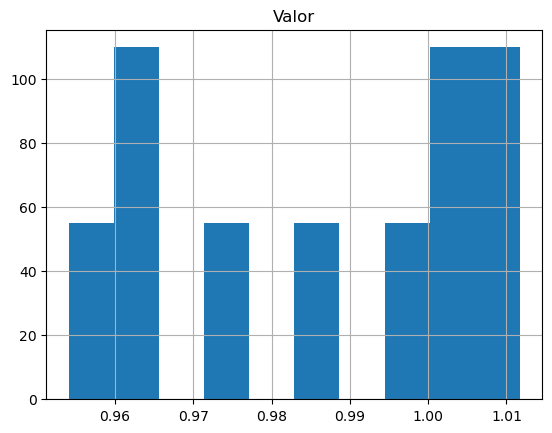

In [90]:
data[(data.estado=='zacatecas')&(data['Int. Horario']=='Base')&(data.division=='BAJÍO')][['Valor']].hist()

In [91]:
data[(data.estado=='zacatecas')&(data['Int. Horario']=='Base')].groupby('division').agg([np.mean, np.std, np.min, np.max])

C:\Users\roker\AppData\Local\Temp\ipykernel_22388\3265261684.py:1: FutureWarning: ['Int. Horario', 'Cargo', 'Unidades', 'state', 'estado'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data[(data.estado=='zacatecas')&(data['Int. Horario']=='Base')].groupby('division').agg([np.mean, np.std, np.min, np.max])


Valor                              year             \
                         mean       std    amin    amax    mean  std  amin   
division                                                                     
BAJÍO                 0.98607  0.020749  0.9541  1.0117  2022.0  0.0  2022   
BAJÍO Y GOLFO CENTRO  0.98607  0.021268  0.9541  1.0117  2022.0  0.0  2022   
JALISCO               0.94817  0.020230  0.9178  0.9725  2022.0  0.0  2022   

                           month                     municipality             \
                      amax  mean       std amin amax         mean        std   
division                                                                       
BAJÍO                 2022   5.5  2.874896    1   10  2414.454545  16.514958   
BAJÍO Y GOLFO CENTRO  2022   5.5  2.946898    1   10  2401.000000   9.233805   
JALISCO               2022   5.5  2.946898    1   10  2402.000000  16.415654   

                                 division_value                 
                      amin  amax           mean  std amin amax  
division                                                        
BAJÍO                 2385  2442            3.0  0.0    3    3  
BAJÍO Y GOLFO CENTRO  2392  2410            4.0  0.0    4    4  
JALISCO               2386  2418           17.0  0.0   17   17